****Describe the data set****
There are 7 companies in the data set
There are 71 cereals in the data set
****
****Show me how many cereals are from each company****
    Company Name  Number of Cereals
2         Kellog                 22
0  General Mills                 21
4           Post                  9
6        Ralston                  7
5         Quaker                  6
3        Nabisco                  5
1  Homestat Farm                  1
****
****Show me the companies by average sugar content****
    Company Name  Grams of Sugar
4           Post        8.777778
0  General Mills        8.190476
2         Kellog        7.227273
6        Ralston        6.142857
5         Quaker        5.333333
1  Homestat Farm        3.000000
3        Nabisco        2.200000
****
****Show me company health statistics*****
    Company Name     Sugar      Carbs   Protein
0  General Mills  8.190476  14.619048  2.285714
1  Homestat Farm  3.000000  16.000000  4.000000
2         Kellog  7.227273  15.

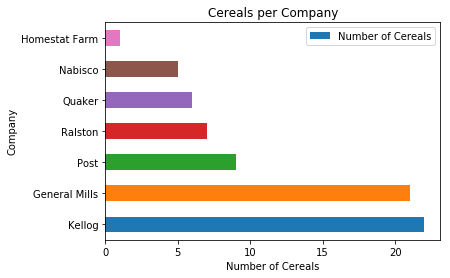

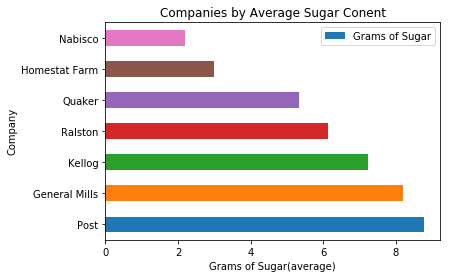

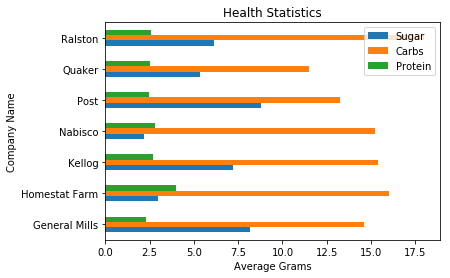

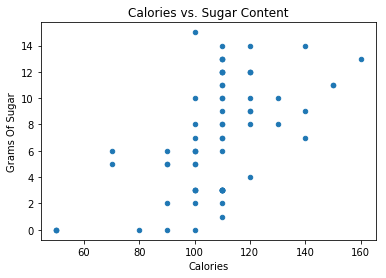

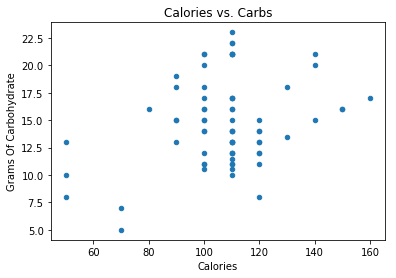

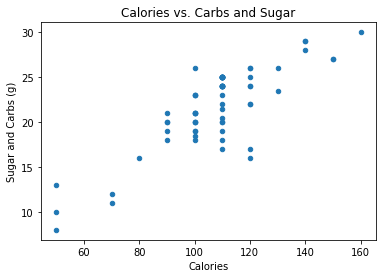

In [156]:
import pandas as pd
import matplotlib
%matplotlib inline

print("****Describe the data set****")
prepped = pd.read_csv('cereals2_prepped.csv')
company = pd.read_csv('cereals2_companies.csv', sep=";")

cerealsprepped = pd.merge(prepped, company, left_on = 'Company', right_on = 'Id')
print("There are {} companies in the data set".format(len(prepped.groupby(["Company"]))))
print("There are {} cereals in the data set".format(len(prepped["Cereal"])))
print("****")

print("****Show me how many cereals are from each company****")
cereals_per_company = cerealsprepped.groupby('Company Name')['Cereal'].count().reset_index()
cereals_per_company = cereals_per_company.rename(columns = {'Cereal':'Number of Cereals'})
cereals_per_company = cereals_per_company.sort_values(by="Number of Cereals",ascending=False)
print(cereals_per_company)

plot = cereals_per_company.plot(kind="barh", x="Company Name",  y="Number of Cereals")
plot.set_ylabel("Company")
plot.set_xlabel("Number of Cereals")
plot.set_title("Cereals per Company")
print("****")

print("****Show me the companies by average sugar content****")
#companyStats = cerealsprepped.groupby('Company Name').agg({'Sugar': ['mean']}).reset_index()
companyStats = cerealsprepped.groupby('Company Name')['Sugar'].mean().reset_index()
companyStats = companyStats.rename(columns = {'Sugar':'Grams of Sugar'})
companyStats = companyStats.sort_values(by="Grams of Sugar",ascending=False)
print(companyStats)

plot = companyStats.plot(kind="barh", x="Company Name",  y="Grams of Sugar")
plot.set_ylabel("Company")
plot.set_xlabel("Grams of Sugar(average)")
plot.set_title("Companies by Average Sugar Conent")
print("****")

print("****Show me company health statistics*****")
companyStats2 = cerealsprepped.groupby('Company Name').agg({'Sugar': 'mean', 'Carbs': 'mean', 'Protein': 'mean'}).reset_index()
print(companyStats2)

plot = companyStats2.plot(kind="barh", x="Company Name", y=["Sugar", "Carbs", "Protein"])
plot.set_ylabel("Company Name")
plot.set_xlabel("Average Grams")
plot.set_title("Health Statistics")
print("****")

print("****Show me the relationship between sugar and calories*****")
sugarAndCalories = cerealsprepped.filter(["Sugar", "Calories"])
sugarAndCalories = sugarAndCalories.sort_values(by="Sugar",ascending=True)
print(sugarAndCalories.head(10))

plot1 = sugarAndCalories.plot(kind="scatter", x="Calories", y="Sugar")
plot1.set_title("Calories vs. Sugar Content")
plot1.set_xlabel("Calories")
plot1.set_ylabel("Grams Of Sugar")
print("****")

print("****Show me the relationship between carbs and calories****")
carbsAndCalories = cerealsprepped.filter(["Carbs", "Calories"])
carbsAndCalories = carbsAndCalories.sort_values(by="Carbs",ascending=True )
print(carbsAndCalories.head(10))

plot2 = carbsAndCalories.plot(kind="scatter", x="Calories", y="Carbs")
plot2.set_title("Calories vs. Carbs")
plot2.set_xlabel("Calories")
plot2.set_ylabel("Grams Of Carbohydrate")
print("****")

print("****Show me the relationship between sugar + carbs and calories****")
cerealsprepped["Sugar Plus Carbs"] = cerealsprepped["Sugar"] + cerealsprepped["Carbs"]
sugarAndCarbs = cerealsprepped.filter(["Carbs", "Calories", "Sugar", "Cereal", "Sugar Plus Carbs"])
print(sugarAndCarbs.head(10))

plot3 = sugarAndCarbs.plot(kind="scatter", x="Calories", y="Sugar Plus Carbs")
plot3.set_title("Calories vs. Carbs and Sugar")
plot3.set_xlabel("Calories")
plot3.set_ylabel("Sugar and Carbs (g)")
print("****")
